In [2]:
# from refinery import RefineryData
from refinery.refinery_bo import RefineryData
import pandas as pd
from datetime import datetime as dt

In [3]:
ref = RefineryData()

In [5]:
kuwait_cap = ref.get_capacity("COUNTRY",['Kuwait'], "CDU", max_date=pd.Timestamp("2024-12-31"))

In [9]:
kuwait_cap.head()

COUNTRY                       KUWAIT                            \
PLANT_NAME   Mina Al-Ahmadi Refinery                             
UNIT_NAME  Crude Distillation Unit 3 Crude Distillation Unit 4   
2000-01-01                     120.0                     200.0   
2000-01-02                     120.0                     200.0   
2000-01-03                     120.0                     200.0   
2000-01-04                     120.0                     200.0   
2000-01-05                     120.0                     200.0   

COUNTRY                                                   \
PLANT_NAME                                                 
UNIT_NAME  Crude Distillation Unit 5 Eocene Topping Unit   
2000-01-01                     122.0                24.0   
2000-01-02                     122.0                24.0   
2000-01-03                     122.0                24.0   
2000-01-04                     122.0                24.0   
2000-01-05                     122.0                24.0   

COUNTRY                                                                    \
PLANT_NAME                        Shuaiba Refinery  Mina Abdulla Refinery   
UNIT_NAME  Atmospheric Distillation Unit (Unit 06) Crude Unit 1 (Unit 01)   
2000-01-01                                   200.0                   80.0   
2000-01-02                                   200.0                   80.0   
2000-01-03                                   200.0                   80.0   
2000-01-04                                   200.0                   80.0   
2000-01-05                                   200.0                   80.0   

COUNTRY                            
PLANT_NAME                         
UNIT_NAME  Crude Unit 2 (Unit 11)  
2000-01-01                  190.0  
2000-01-02                  190.0  
2000-01-03                  190.0  
2000-01-04                  190.0  
2000-01-05                  190.0

<Axes: >

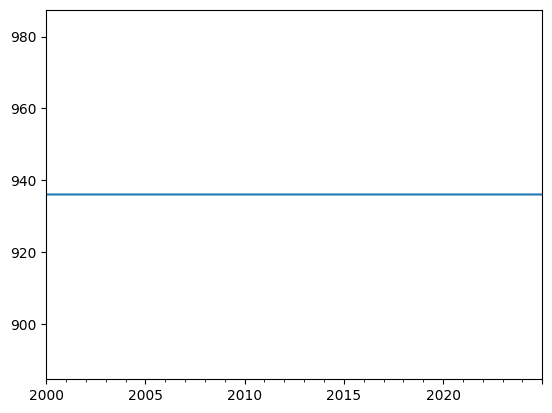

In [8]:
kuwait_cap.sum(axis=1).plot()

In [3]:
IIR_Countries = ['Austria','Belgium','Denmark','Finland','France','Germany','Greece','Ireland','Italy','Netherlands','Norway','Portugal','Spain','Sweden','United Kingdom','Turkey','Czech Republic','Hungary','Poland','Slovakia','Switzerland']

In [6]:
etst = ref.get_capacity("COUNTRY", ["United Kingdom", "Greece", "France"], "CDU", max_date=pd.Timestamp("2023-1-1")).resample('AS').mean().astype(int)

In [30]:
def get_available_capacity(ctry_list):
    ref = RefineryData()
    capacity = ref.get_capacity("COUNTRY", ctry_list, "CDU").groupby(level=0, axis=1).sum()
    outages = ref.get_outage("COUNTRY", ctry_list, "CDU").groupby(level=0, axis=1).sum()
    av_cap = capacity - outages
    return av_cap


In [4]:
outages = ref.get_outage("COUNTRY", IIR_Countries, "CDU", "Unplanned").groupby(level=0, axis=1).sum()

In [9]:
outages.loc['2023':].resample('MS').mean()

COUNTRY     Austria  Belgium  Czech Republic  Denmark  Finland  France  \
2023-01-01      0.0      0.0        4.516129      0.0      0.0     0.0   
2023-02-01      0.0      0.0        0.000000      0.0      0.0     0.0   
2023-03-01      0.0      0.0        0.000000      0.0      0.0     0.0   

COUNTRY        Germany  Greece    Hungary  Ireland  ...  Netherlands  Norway  \
2023-01-01  204.374194     0.0  18.303226      0.0  ...          0.0     0.0   
2023-02-01  178.000000     0.0   0.000000      0.0  ...          0.0     0.0   
2023-03-01  178.000000     0.0   0.000000      0.0  ...          0.0     0.0   

COUNTRY     Poland  Portugal  Slovakia      Spain  Sweden  Switzerland  \
2023-01-01     0.0       0.0       0.0  64.806452     0.0          0.0   
2023-02-01     0.0       0.0       0.0  39.000000     0.0          0.0   
2023-03-01     0.0       0.0       0.0   7.548387     0.0          0.0   

COUNTRY     Turkey  United Kingdom  
2023-01-01     0.0       28.387097  
2023-02-01     0.0        0.000000  
2023-03-01     0.0        0.000000  

[3 rows x 21 columns]

In [11]:
outages.loc['2023-02-1']

COUNTRY
Austria             0.0
Belgium             0.0
Czech Republic      0.0
Denmark             0.0
Finland             0.0
France              0.0
Germany           178.0
Greece              0.0
Hungary             0.0
Ireland             0.0
Italy               0.0
Netherlands         0.0
Norway              0.0
Poland              0.0
Portugal            0.0
Slovakia            0.0
Spain              39.0
Sweden              0.0
Switzerland         0.0
Turkey              0.0
United Kingdom      0.0
Name: 2023-02-01 00:00:00, dtype: float64

In [10]:
data = ref.get_capacity("COUNTRY", ['Republic of Korea-S.Korea',], "CDU", max_date=pd.Timestamp("2023-1-1")).resample('MS').mean().astype(int)

In [20]:
sk_cap  = data.groupby(level=0, axis=1).sum()

In [21]:
sk_cap

COUNTRY     Republic of Korea-S.Korea
2000-01-01                       3019
2000-02-01                       3019
2000-03-01                       3019
2000-04-01                       3019
2000-05-01                       3019
...                               ...
2022-09-01                       3019
2022-10-01                       3019
2022-11-01                       3019
2022-12-01                       3019
2023-01-01                       3019

[277 rows x 1 columns]

In [31]:
sk_av_cap = get_available_capacity(['Republic of Korea-S.Korea'])

<AxesSubplot:>

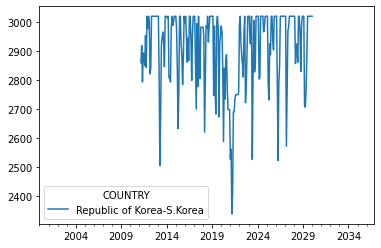

In [34]:
monthly = sk_av_cap.resample('MS').mean()
sk_av_cap.resample('MS').mean().plot()

In [35]:
monthly.loc['2019':'2022']

COUNTRY     Republic of Korea-S.Korea
2019-01-01                3019.000000
2019-02-01                3019.000000
2019-03-01                2745.612903
2019-04-01                2985.100000
2019-05-01                2751.419355
2019-06-01                2681.800000
2019-07-01                2998.677419
2019-08-01                3019.000000
2019-09-01                2979.000000
2019-10-01                2671.903226
2019-11-01                2925.466667
2019-12-01                2956.290323
2020-01-01                2985.322581
2020-02-01                2965.000000
2020-03-01                2836.000000
2020-04-01                2586.766667
2020-05-01                2840.096774
2020-06-01                2733.000000
2020-07-01                2870.935484
2020-08-01                2886.290323
2020-09-01                2765.183333
2020-10-01                2697.500000
2020-11-01                2697.500000
2020-12-01                2697.500000
2021-01-01                2525.951613
2021-02-01                2561.000000
2021-03-01                2337.451613
2021-04-01                2405.000000
2021-05-01                2689.000000
2021-06-01                2689.000000
2021-07-01                2731.225806
2021-08-01                2748.500000
2021-09-01                2748.500000
2021-10-01                2748.500000
2021-11-01                2748.500000
2021-12-01                2757.225806
2022-01-01                2988.032258
2022-02-01                3019.000000
2022-03-01                2929.483871
2022-04-01                2881.500000
2022-05-01                2853.838710
2022-06-01                2809.666667
2022-07-01                2964.806452
2022-08-01                3019.000000
2022-09-01                2720.666667
2022-10-01                2781.903226
2022-11-01                2888.666667
2022-12-01                3019.000000